### https://www.kaggle.com/jsjeong/tfp-layers-regression/edit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('.\\data\\uncertainty1.xlsx', dtype=float,header=None)

In [3]:
df.describe()

,0,1
count,245.000000,245.000000
mean,24.254286,19776.597551
std,6.900626,3973.829227
min,7.900000,14019.120000
25%,19.700000,16023.360000
50%,26.100000,19301.280000
75%,29.100000,22804.320000
max,36.800000,29781.120000


In [4]:
xs=df[0]

In [5]:
xs.shape

(245,)

In [6]:
xs=np.array(xs)

In [7]:
#x1

In [8]:
xs = xs[..., np.newaxis]

In [9]:
xs.shape

(245, 1)

In [10]:
ys=df[1]

In [11]:
ys=np.array(ys)

In [12]:
ys.shape

(245,)

In [13]:
w0 = 0.125
b0 = 10000.
n_samples = 245

y_range = [10000, 30000]
x_range = [0, 40]
x_domain = np.linspace(*x_range, n_samples)

def load_dataset(n=n_samples, n_tst=n_samples):
  np.random.seed(43)
  def s(x):
    g = (x - x_range[0]) / (x_range[1] - x_range[0])
    return 3 * (0.25 + g**2.)
  x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
  eps = np.random.randn(n) * s(x)
  y = (w0 * x * (1. + np.sin(x)) + b0) + eps
  x = x[..., np.newaxis]
  x_tst = np.linspace(*x_range, num=n_tst).astype(np.float32)
  x_tst = x_tst[..., np.newaxis]
  return y, x, x_tst

#ys, xs, xs_tst = load_dataset()
xs_tst=np.linspace(*x_range, n_samples).astype(np.float32)
xs_tst = xs_tst[..., np.newaxis]

In [14]:
xs_tst.shape

(245, 1)

In [15]:
ys=np.array(ys)
ys

array([15824.4 , 15608.88, 15234.96, 15740.88, 15568.32, 16257.36,
       16007.76, 15661.92, 14954.64, 14979.12, 15352.8 , 15901.68,
       15815.28, 16030.32, 15760.32, 15653.76, 16023.36, 16007.04,
       15812.88, 15958.32, 16052.64, 16625.76, 16221.36, 16165.68,
       16062.72, 15297.6 , 15447.84, 15232.8 , 14019.12, 15402.  ,
       15627.12, 16166.88, 15691.44, 15890.64, 15254.64, 15385.68,
       15192.96, 14950.8 , 15514.08, 15445.68, 15635.76, 15326.88,
       15883.92, 15365.52, 14970.96, 15536.88, 15843.6 , 16286.16,
       15550.56, 15831.36, 15899.04, 15266.4 , 16608.72, 17217.84,
       17900.4 , 16414.08, 15222.72, 15834.24, 14963.52, 15455.04,
       16212.72, 16609.68, 17283.84, 17967.12, 18045.12, 17839.44,
       16340.88, 16987.92, 16546.08, 16451.76, 17362.56, 18100.32,
       18052.56, 17782.08, 19538.4 , 19569.36, 19684.08, 20489.04,
       19118.16, 18276.48, 16974.48, 17312.88, 17811.84, 20034.72,
       21822.48, 20516.64, 20726.4 , 18115.2 , 17643.12, 19251

In [16]:
import tensorflow as tf
import tensorflow_probability as tfp

# functional programming
from functools import partial

# plotting
import matplotlib.pyplot as plt

In [17]:
# plot utilities
%matplotlib inline
plt.style.use('ggplot')
def plt_left_title(title): plt.title(title, loc="left", fontsize=18)
def plt_right_title(title): plt.title(title, loc='right', fontsize=13, color='grey')

# use eager execution for better ease-of-use and readability
#tf.enable_eager_execution()

# aliases
tfk = tf.keras
tfd = tfp.distributions

print(f"            tensorflow version: {tf.__version__}")
print(f"tensorflow probability version: {tfp.__version__}")

            tensorflow version: 2.3.1
tensorflow probability version: 0.11.0


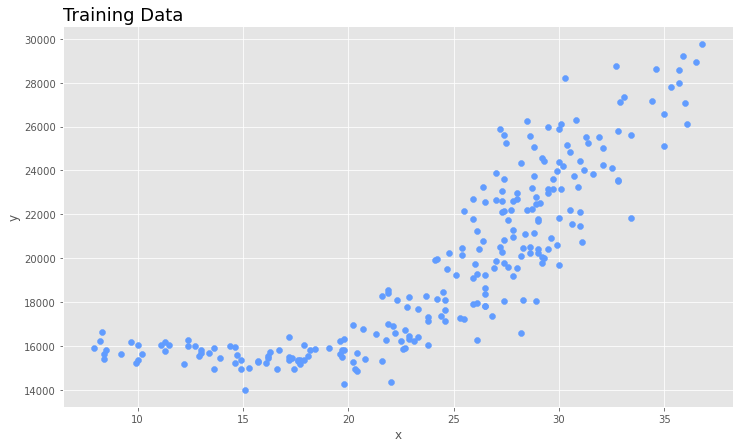

In [18]:
def plot_training_data(): 
    plt.figure(figsize=(12, 7))
    plt.scatter(xs, ys, c="#619CFF", label="training data")
    plt.xlabel("x")
    plt.ylabel("y")

plot_training_data()
plt_left_title("Training Data");

In [19]:
def neg_log_lik(y, rv_y):
    """Evaluate negative log-likelihood of a random variable `rv_y` for data `y`"""
    return -rv_y.log_prob(y)

In [20]:
### CASE 1

In [21]:
# model outputs normal distribution with constant variance
model_case_1 = tfk.Sequential([
    tfk.layers.Dense(1),
    tfp.layers.DistributionLambda(
        lambda t: tfd.Normal(loc=t, scale=1.0)
    )
])

# train the model
model_case_1.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), 
                    loss=neg_log_lik)
model_case_1.fit(xs, ys, 
                 epochs=500,
                 verbose=False)

print(f"predicted w : {model_case_1.layers[-2].kernel.numpy()}")
print(f"predicted b : {model_case_1.layers[-2].bias.numpy()}")

predicted w : [[40.4473]]
predicted b : [39.664898]


In [22]:
# predict xs
yhat = model_case_1(xs_tst)

In [23]:
print(yhat.mean())

tf.Tensor(
[[  39.664898]
 [  46.2956  ]
 [  52.926308]
 [  59.557014]
 [  66.18771 ]
 [  72.81842 ]
 [  79.44913 ]
 [  86.079834]
 [  92.71054 ]
 [  99.34125 ]
 [ 105.97194 ]
 [ 112.602646]
 [ 119.23335 ]
 [ 125.86406 ]
 [ 132.49477 ]
 [ 139.12547 ]
 [ 145.75618 ]
 [ 152.38689 ]
 [ 159.0176  ]
 [ 165.6483  ]
 [ 172.27899 ]
 [ 178.9097  ]
 [ 185.5404  ]
 [ 192.17111 ]
 [ 198.80182 ]
 [ 205.43253 ]
 [ 212.06323 ]
 [ 218.69394 ]
 [ 225.32463 ]
 [ 231.95535 ]
 [ 238.58604 ]
 [ 245.21677 ]
 [ 251.84746 ]
 [ 258.47818 ]
 [ 265.10886 ]
 [ 271.73956 ]
 [ 278.37027 ]
 [ 285.00098 ]
 [ 291.63168 ]
 [ 298.2624  ]
 [ 304.89307 ]
 [ 311.5238  ]
 [ 318.15448 ]
 [ 324.78522 ]
 [ 331.4159  ]
 [ 338.0466  ]
 [ 344.6773  ]
 [ 351.308   ]
 [ 357.93872 ]
 [ 364.56946 ]
 [ 371.20013 ]
 [ 377.83084 ]
 [ 384.46155 ]
 [ 391.09222 ]
 [ 397.72296 ]
 [ 404.35367 ]
 [ 410.98434 ]
 [ 417.61505 ]
 [ 424.2458  ]
 [ 430.8765  ]
 [ 437.50717 ]
 [ 444.13788 ]
 [ 450.76862 ]
 [ 457.3993  ]
 [ 464.03    ]
 [ 470.6607  ]

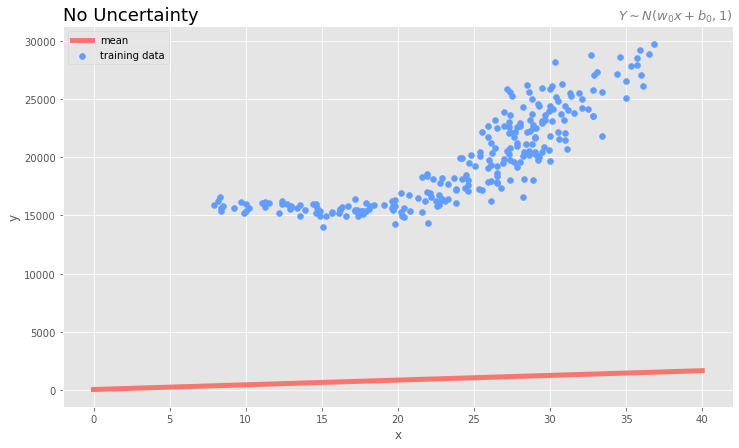

In [24]:
plot_training_data()
plt_left_title("No Uncertainty")
plt_right_title("$Y \sim N(w_0 x + b_0, 1)$")
# plot predicted means for each x
plt.plot(x_domain, yhat.mean(), "#F8766D", linewidth=5, label="mean")
plt.legend();

### CASE 2

In [25]:
def normal_scale_uncertainty(t, softplus_scale=0.05):
    """Create distribution with variable mean and variance"""
    ts = t[..., :1]
    return tfd.Normal(loc = ts,
                      scale = 1e-3 + tf.math.softplus(softplus_scale * ts))

In [26]:
# model outputs normal distribution with mean and variance that 
# depend on the input
model_case_2 = tfk.Sequential([
    tfk.layers.Dense(2),
    tfp.layers.DistributionLambda(normal_scale_uncertainty)
])

model_case_2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05),
                    loss=neg_log_lik)
model_case_2.fit(xs, ys,
                epochs=500,
                verbose=False)

print("Model 2 weights:")
[print(np.squeeze(w.numpy())) for w in model_case_2.weights];

Model 2 weights:
[11.66173     0.01840878]
[14.719889  0.      ]


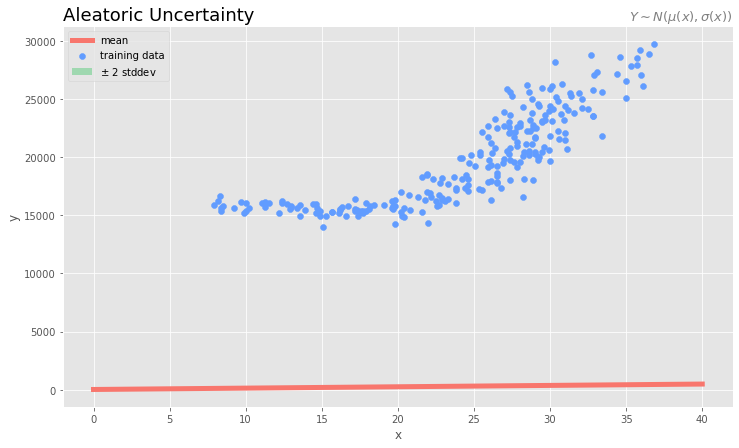

In [27]:
# predict normal distributions for each x
yhat = model_case_2(xs_tst)

# get mean and variance
yhat_mean = yhat.mean()
yhat_std = yhat.stddev()

plot_training_data()
plt_left_title("Aleatoric Uncertainty")
plt_right_title("$Y \sim N(\mu (x), \sigma (x))$")
# plot mean
plt.plot(x_domain, yhat_mean, "#F8766D", linewidth=5, label="mean")
# plot 2 stddev from mean
plt.fill_between(x_domain,
                 (yhat_mean + 2 * yhat_std)[:, 0], 
                 (yhat_mean - 2 * yhat_std)[:, 0],
                 facecolor="#00BA38", alpha=0.3,
                 label="$\pm$ 2 stddev")
plt.legend();

### CASE 2

In [28]:
def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    c = np.log(np.expm1(1.0))
    
    return tfk.Sequential([
        tfp.layers.VariableLayer(2 * n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t[..., :n], 
                       scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
            reinterpreted_batch_ndims=1))
    ])

def prior_trainable(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    
    return tfk.Sequential([
        tfp.layers.VariableLayer(n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t, scale=1.0),
            reinterpreted_batch_ndims=1))
    ])

In [29]:
model_case_3 = tfk.Sequential([
    tfp.layers.DenseVariational(1, 
                            posterior_mean_field, 
                            prior_trainable),
    tfp.layers.DistributionLambda(
        lambda t: tfd.Normal(loc=t, scale=1.0)
    )
])

model_case_3.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                     loss=neg_log_lik)
model_case_3.fit(xs, ys,
                 epochs=1000,
                 verbose=False)

print("Model 3 weights:")
[print(np.squeeze(w.numpy())) for w in model_case_3.weights];

Model 3 weights:
[78.90362    79.11554    -2.476627   -0.92163014]
[77.095894 76.80683 ]


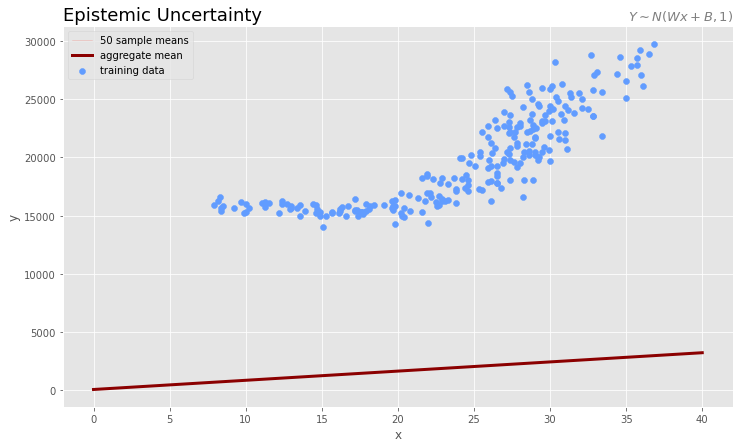

In [30]:
# sample posterior
n_posterior_samples = 50
yhats = [model_case_3(xs_tst) for _ in range(n_posterior_samples)]

plot_training_data()
plt_left_title("Epistemic Uncertainty")
plt_right_title("$Y \sim N(W x + B, 1)$")

# plot means for each posterior sample
for i, yhat in enumerate(yhats):
    plt.plot(xs_tst, yhat.mean(), 
             '#F8766D', linewidth=0.5, alpha=0.5, 
             label=f"{n_posterior_samples} sample means" if i==0 else None)

# plot overall mean
yhats_mean = sum(yh.mean() for yh in yhats) / len(yhats)
plt.plot(xs_tst, yhats_mean, 'darkred', linewidth=3, label="aggregate mean")
plt.legend();

Case 4: Aleatoric & Epistemic Uncertainty

In [31]:
model_case_4 = tfk.Sequential([
    tfp.layers.DenseVariational(2, 
                                posterior_mean_field,
                                prior_trainable),
    tfp.layers.DistributionLambda(partial(normal_scale_uncertainty, softplus_scale=0.01))
])

model_case_4.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                     loss=neg_log_lik)
model_case_4.fit(xs, ys,
                 epochs=1000,
                 verbose=False)

print("Model 4 weights:")
[print(np.squeeze(w.numpy())) for w in model_case_4.weights];

Model 4 weights:
[ 2.2137070e+01  4.1239075e-02  2.6539438e+01 -2.1392927e-02
 -1.5534176e+00  1.0220003e-03 -6.9857728e-01  7.7940971e-02]
[ 2.2074886e+01 -4.1239049e-02  2.6283283e+01  2.1392830e-02]


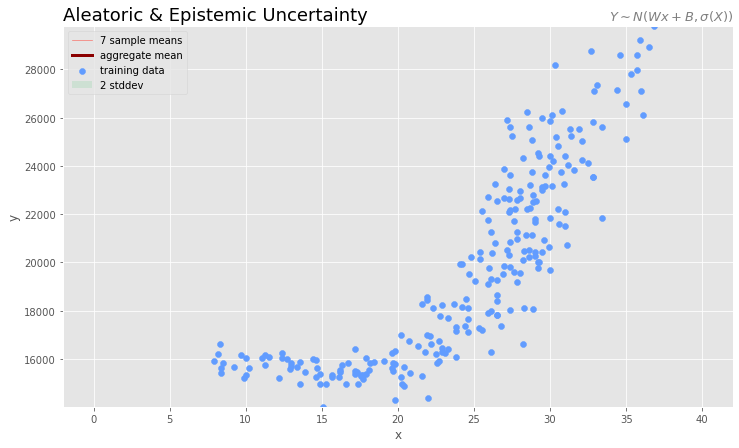

In [32]:
yhats = [model_case_4(xs_tst) for _ in range(7)]

plot_training_data()
plt_left_title("Aleatoric & Epistemic Uncertainty")
plt_right_title("$Y \sim N ( W x + B, \sigma(X) )$")
plt.ylim(ys.min() - 5, ys.max() + 5)

# for each posterior sample, plot mean plus/minus 2 std
for i, yhat in enumerate(yhats):
    m = yhat.mean()[:, 0]
    s = yhat.stddev()[:, 0]

    plt.plot(xs_tst, m, "#F8766D", linewidth=0.7, 
             label=f"{len(yhats)} sample means" if i==0 else None)
    plt.fill_between(xs_tst[:, 0],
                     m - 2 * s, m + 2 * s,
                     facecolor="#00BA38", alpha=0.1,
                     label=f"2 stddev" if i==0 else None)
    
# plot overall mean
yhats_mean = sum(yh.mean() for yh in yhats) / len(yhats)
plt.plot(xs_tst, yhats_mean, 'darkred', linewidth=3, label="aggregate mean")

plt.legend();

### Case 5: Functional Uncertainty

In [33]:
class RBFKernelFn(tfk.layers.Layer):
    def __init__(self, **kwargs):
        super(RBFKernelFn, self).__init__(**kwargs)
        dtype = kwargs.get('dtype', None)
        
        self._amplitude = self.add_variable(
            initializer=tf.constant_initializer(0),
            dtype=dtype,
            name="amplitude"
        )
        
        self._length_scale = self.add_variable(
            initializer=tf.constant_initializer(0),
            dtype=dtype,
            name="length_scale"
        )
    
    def call(self, x):
        return x
    
    @property
    def kernel(self):
        return tfp.positive_semidefinite_kernels.ExponentiatedQuadratic(
            amplitude=tf.nn.softplus(0.1 * self._amplitude),
            length_scale=tf.nn.softplus(5.0 * self._length_scale))

In [34]:
num_inducing_points = 40
inducing_index_points_initializer = np.linspace(*x_range, num=num_inducing_points, dtype=xs.dtype)[..., np.newaxis],

model_case_5 = tfk.Sequential([
    tfk.layers.InputLayer(input_shape=[1], dtype=xs.dtype),
    tfk.layers.Dense(1, 
                     kernel_initializer="ones", 
                     use_bias=False),
    tfp.layers.VariationalGaussianProcess(
        num_inducing_points=num_inducing_points,
        kernel_provider=RBFKernelFn(dtype=xs.dtype),
        event_shape=[1],
        inducing_index_points_initializer=tf.constant_initializer(inducing_index_points_initializer),
        unconstrained_observation_noise_variance_initializer=(tf.constant_initializer(np.array(0.54).astype(xs.dtype)))
    )
])

batch_size = 32

def variational_loss(y, rv_y):
    return rv_y.variational_loss(y, 
                                 kl_weight=np.array(batch_size, xs.dtype) / xs.shape[0])

model_case_5.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                    loss=variational_loss)
model_case_5.fit(xs, ys,
                 batch_size=batch_size,
                 epochs=800,
                 verbose=False)

Instructions for updating:
Please use `layer.add_weight` method instead.


AttributeError: module 'tensorflow_probability' has no attribute 'positive_semidefinite_kernels'

In [ ]:
yhats = model_case_5(xs_test)

plot_training_data()
plt_left_title("Gaussian Process Regression")
plt_right_title("$ Y \sim GPR(f(X)) $")
plt.ylim(ys.min() - 5, ys.max() + 5)

n_gpr_samples = 50
for _ in range(n_gpr_samples):
    sample_ = yhats.sample().numpy()[..., 0]
    plt.plot(xs_tst, sample_, "#F8766D", linewidth=0.9, alpha=0.4,
             label=f"{n_gpr_samples} GPR samples" if _==0 else None)
    
plt.legend();

In [ ]:
# For numeric stability, set the default floating-point dtype to float64
tf.keras.backend.set_floatx('float64')

# Build model.
num_inducing_points = 40
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[1]),
    tf.keras.layers.Dense(1, kernel_initializer='ones', use_bias=False),
    tfp.layers.VariationalGaussianProcess(
        num_inducing_points=num_inducing_points,
        kernel_provider=RBFKernelFn(),
        event_shape=[1],
        inducing_index_points_initializer=tf.constant_initializer(
            np.linspace(*x_range, num=num_inducing_points,
                        dtype=xs.dtype)[..., np.newaxis]),
        unconstrained_observation_noise_variance_initializer=(
            tf.constant_initializer(np.array(0.54).astype(xs.dtype))),
    ),
])

# Do inference.
batch_size = 32
loss = lambda y, rv_y: rv_y.variational_loss(
    y, kl_weight=np.array(batch_size, x.dtype) / x.shape[0])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=loss)
model.fit(x, y, batch_size=batch_size, epochs=1000, verbose=False)

# Profit.
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

In [ ]:

import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability.positive_semidefinite_kernel import util
tfpk = tfp.math.psd_kernels


In [ ]:
from tensorflow_probability import positive_semidefinite_kernels as tfk

In [ ]:
from tensorflow_probability import distributions as tfd